# ประเทศสวีเดนเป็นประเทศที่สงบและผู้คนมีความสุข...จริงเหรอ?

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas version = {pd.__version__}')
print(f'seaborn version = {sns.__version__}')
print(pd.Timestamp.now())

pandas version = 2.2.0
seaborn version = 0.13.2
2024-03-12 15:42:57.595265


## อัตราการลักทรัพย์ของประเทศทั่วโลก
- main page : https://www-portal-euromonitor-com.chula.idm.oclc.org/portal/StatisticsEvolution/Index  
- source : https://raw.githubusercontent.com/KaiPloy/Project2024/main/Burglary%20Rate.csv
- as of 27-Jan-2024

In [3]:
db= pd.read_csv('https://raw.githubusercontent.com/KaiPloy/Project2024/main/Burglary%20Rate.csv', skipfooter= 6, skiprows=5)
db.head()

C:\Users\taruw\AppData\Local\Temp\ipykernel_6480\2057228840.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  db= pd.read_csv('https://raw.githubusercontent.com/KaiPloy/Project2024/main/Burglary%20Rate.csv', skipfooter= 6, skiprows=5)


,Geography,Category,Data Type,Unit,Current Constant,2018,2019,2020,2021,2022,2023
0,Afghanistan,Burglary,Socio-economic indicators,"per 100,000 population",-,9.3,9.3,9.3,9.3,9.4,9.4
1,American Samoa,Burglary,Socio-economic indicators,"per 100,000 population",-,264.1,263.0,322.2,336.7,355.2,363.4
2,Armenia,Burglary,Socio-economic indicators,"per 100,000 population",-,110.7,116.9,130.1,135.0,139.5,141.8
3,Azerbaijan,Burglary,Socio-economic indicators,"per 100,000 population",-,57.0,52.1,46.5,43.9,41.8,40.6
4,Bhutan,Burglary,Socio-economic indicators,"per 100,000 population",-,48.8,50.2,30.8,26.4,32.3,32.7


In [4]:
# check info
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Geography         121 non-null    object
 1   Category          121 non-null    object
 2   Data Type         121 non-null    object
 3   Unit              121 non-null    object
 4   Current Constant  121 non-null    object
 5   2018              121 non-null    object
 6   2019              121 non-null    object
 7   2020              121 non-null    object
 8   2021              121 non-null    object
 9   2022              121 non-null    object
 10  2023              121 non-null    object
dtypes: object(11)
memory usage: 10.5+ KB


In [5]:
db.drop(columns=['Current Constant', 'Category', 'Data Type', 'Unit'], inplace=True)
db.rename(columns={'Geography':'Country'}, inplace=True)
db_year = db.iloc[:, 1:].replace(r',', '', regex=True).astype(float)
db = pd.concat([db['Country'], db_year], axis=1)

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  121 non-null    object 
 1   2018     121 non-null    float64
 2   2019     121 non-null    float64
 3   2020     121 non-null    float64
 4   2021     121 non-null    float64
 5   2022     121 non-null    float64
 6   2023     121 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.7+ KB


In [7]:
db_with_mean = pd.DataFrame(db.iloc[:, 1:].mean(axis=1)).round(2)
db_with_mean.rename(columns={0:'Mean'}, inplace=True)
db_with_mean = pd.concat([db['Country'], db_with_mean], axis=1)
# เรียงลำดับจาก มาก -> น้อย ตามค่าเฉลี่ย
db_with_mean.sort_values('Mean', ascending=False, inplace=True)
db_with_mean.head(10)

,Country,Mean
6,Guam,2643.37
90,Seychelles,2220.22
53,Bermuda,1214.60
27,New Zealand,1188.37
117,Sweden,751.92
55,Chile,749.70
102,Denmark,681.58
110,Luxembourg,675.52
120,United Kingdom,662.30
71,St Vincent and the Grenadines,648.72


In [8]:
# เรียงลำดับจาก มาก -> น้อย ตามปี 2023
db.sort_values('2023', ascending=False, inplace=True)
db.head(10)

,Country,2018,2019,2020,2021,2022,2023
6,Guam,1280.9,1280.9,1920.5,3155.0,3789.6,4433.3
90,Seychelles,2187.3,2208.8,2221.4,2229.9,2235.2,2238.7
53,Bermuda,1214.6,1214.6,1214.6,1214.6,1214.6,1214.6
27,New Zealand,1334.0,1400.3,1171.8,1121.8,1116.4,985.9
61,Grenada,563.4,556.3,554.6,456.0,749.8,858.9
117,Sweden,769.9,737.5,785.7,753.4,760.2,704.8
110,Luxembourg,606.9,676.9,700.1,559.4,810.4,699.4
120,United Kingdom,668.5,669.0,661.7,660.0,657.8,656.8
55,Chile,1086.5,952.9,630.0,591.2,635.6,602.0
104,France,548.8,544.7,454.6,462.2,485.5,509.7


## ดัชนีค่าความสุขของประเทศทั่วโลก
- main page : https://www.kaggle.com/datasets/simonaasm/world-happiness-index-by-reports-2013-2023/code  
- source : https://raw.githubusercontent.com/KaiPloy/Project2024/main/World%20Happiness%20Index.csv
- as of 28-Jan-2024

In [9]:
dh = pd.read_csv('https://raw.githubusercontent.com/KaiPloy/Project2024/main/World%20Happiness%20Index.csv')
dh.head()

,Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143
1,Afghanistan,2015,3.575,153
2,Afghanistan,2016,3.360,154
3,Afghanistan,2017,3.794,141
4,Afghanistan,2018,3.632,145


In [10]:
# check info
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  1523 non-null   object 
 1   Year     1523 non-null   int64  
 2   Index    1523 non-null   float64
 3   Rank     1523 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 47.7+ KB


In [11]:
dh.drop('Rank', axis=1, inplace=True)
dh = dh.pivot(index='Country', columns='Year', values='Index').reset_index()
dh.drop([2013, 2015, 2016, 2017], axis=1, inplace=True)
dh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  167 non-null    object 
 1   2018     156 non-null    float64
 2   2019     156 non-null    float64
 3   2020     153 non-null    float64
 4   2021     149 non-null    float64
 5   2022     146 non-null    float64
 6   2023     137 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.3+ KB


In [12]:
# ลบแถวที่มี Missing Value
dh = dh.dropna(axis = 0)
dh.columns.name = None # Remove the name of the columns index = Year
dh.head()

,Country,2018,2019,2020,2021,2022,2023
0,Afghanistan,3.632,3.203,2.567,2.523,2.404,1.859
1,Albania,4.586,4.719,4.883,5.117,5.199,5.277
2,Algeria,5.295,5.211,5.005,4.887,5.122,5.329
4,Argentina,6.388,6.086,5.975,5.929,5.967,6.024
5,Armenia,4.321,4.559,4.677,5.283,5.399,5.342


In [13]:
# หาค่าเฉลี่ย
dh_numeric = dh.columns[1:] #เอาคอลัมน์แค่ปี
dh_mean = dh[dh_numeric].mean(axis=1)
# สร้าง Dataframe ใหม่
dh_with_mean = pd.DataFrame({
    'Country' : dh['Country'],
    'Mean' : dh_mean
})
dh_with_mean.head(10)

,Country,Mean
0,Afghanistan,2.698000
1,Albania,4.963500
2,Algeria,5.141500
4,Argentina,6.061500
5,Armenia,4.930167
6,Australia,7.193833
7,Austria,7.201167
9,Bahrain,6.333000
10,Bangladesh,4.708500
12,Belgium,6.868667


In [14]:
# เรียงลำดับจาก มาก -> น้อย ตามค่าเฉลี่ย
dh_with_mean.sort_values('Mean', ascending=False, inplace=True)
dh_with_mean.head(10)

,Country,Mean
48,Finland,7.779500
39,Denmark,7.607167
62,Iceland,7.532167
144,Switzerland,7.475000
111,Norway,7.451333
104,Netherlands,7.443333
143,Sweden,7.358667
105,New Zealand,7.255167
68,Israel,7.242000
7,Austria,7.201167


In [15]:
# เรียงลำดับจาก มาก -> น้อย ตามปี 2023
dh.sort_values(2023, ascending=False, inplace=True)
dh.head(10)

,Country,2018,2019,2020,2021,2022,2023
48,Finland,7.632,7.769,7.809,7.842,7.821,7.804
39,Denmark,7.555,7.600,7.646,7.620,7.636,7.586
62,Iceland,7.494,7.554,7.504,7.554,7.557,7.530
68,Israel,7.190,7.139,7.129,7.157,7.364,7.473
104,Netherlands,7.441,7.488,7.449,7.464,7.415,7.403
143,Sweden,7.314,7.343,7.353,7.363,7.384,7.395
111,Norway,7.594,7.554,7.488,7.392,7.365,7.315
144,Switzerland,7.487,7.480,7.560,7.571,7.512,7.240
86,Luxembourg,6.910,7.090,7.238,7.324,7.404,7.228
105,New Zealand,7.324,7.307,7.300,7.277,7.200,7.123


### Inner join

In [16]:
dm = pd.merge(db_with_mean
              , dh_with_mean
              , on='Country')
dm.rename(columns={'Mean_x': 'Burglary_Rate', 'Mean_y':'Happiness_Index'}, inplace=True)
dm.head(10)

,Country,Burglary_Rate,Happiness_Index
0,New Zealand,1188.37,7.255167
1,Sweden,751.92,7.358667
2,Chile,749.70,6.304333
3,Denmark,681.58,7.607167
4,Luxembourg,675.52,7.199000
5,United Kingdom,662.30,6.972667
6,Austria,550.05,7.201167
7,Australia,534.33,7.193833
8,North Macedonia,502.57,5.195500
9,France,500.92,6.630500


In [17]:
dm.shape

(86, 3)

In [18]:
# เรียงลำดับจาก มาก -> น้อย ตามอัตราการลักทรัพย์
dm.sort_values('Burglary_Rate', ascending=False, inplace=True)

# กราฟแสดงข้อมูลผลการวิเคราะห์

## 1. ดัชนีค่าความสุขโดยรวมของทั่วโลก 10 อันดับแรก

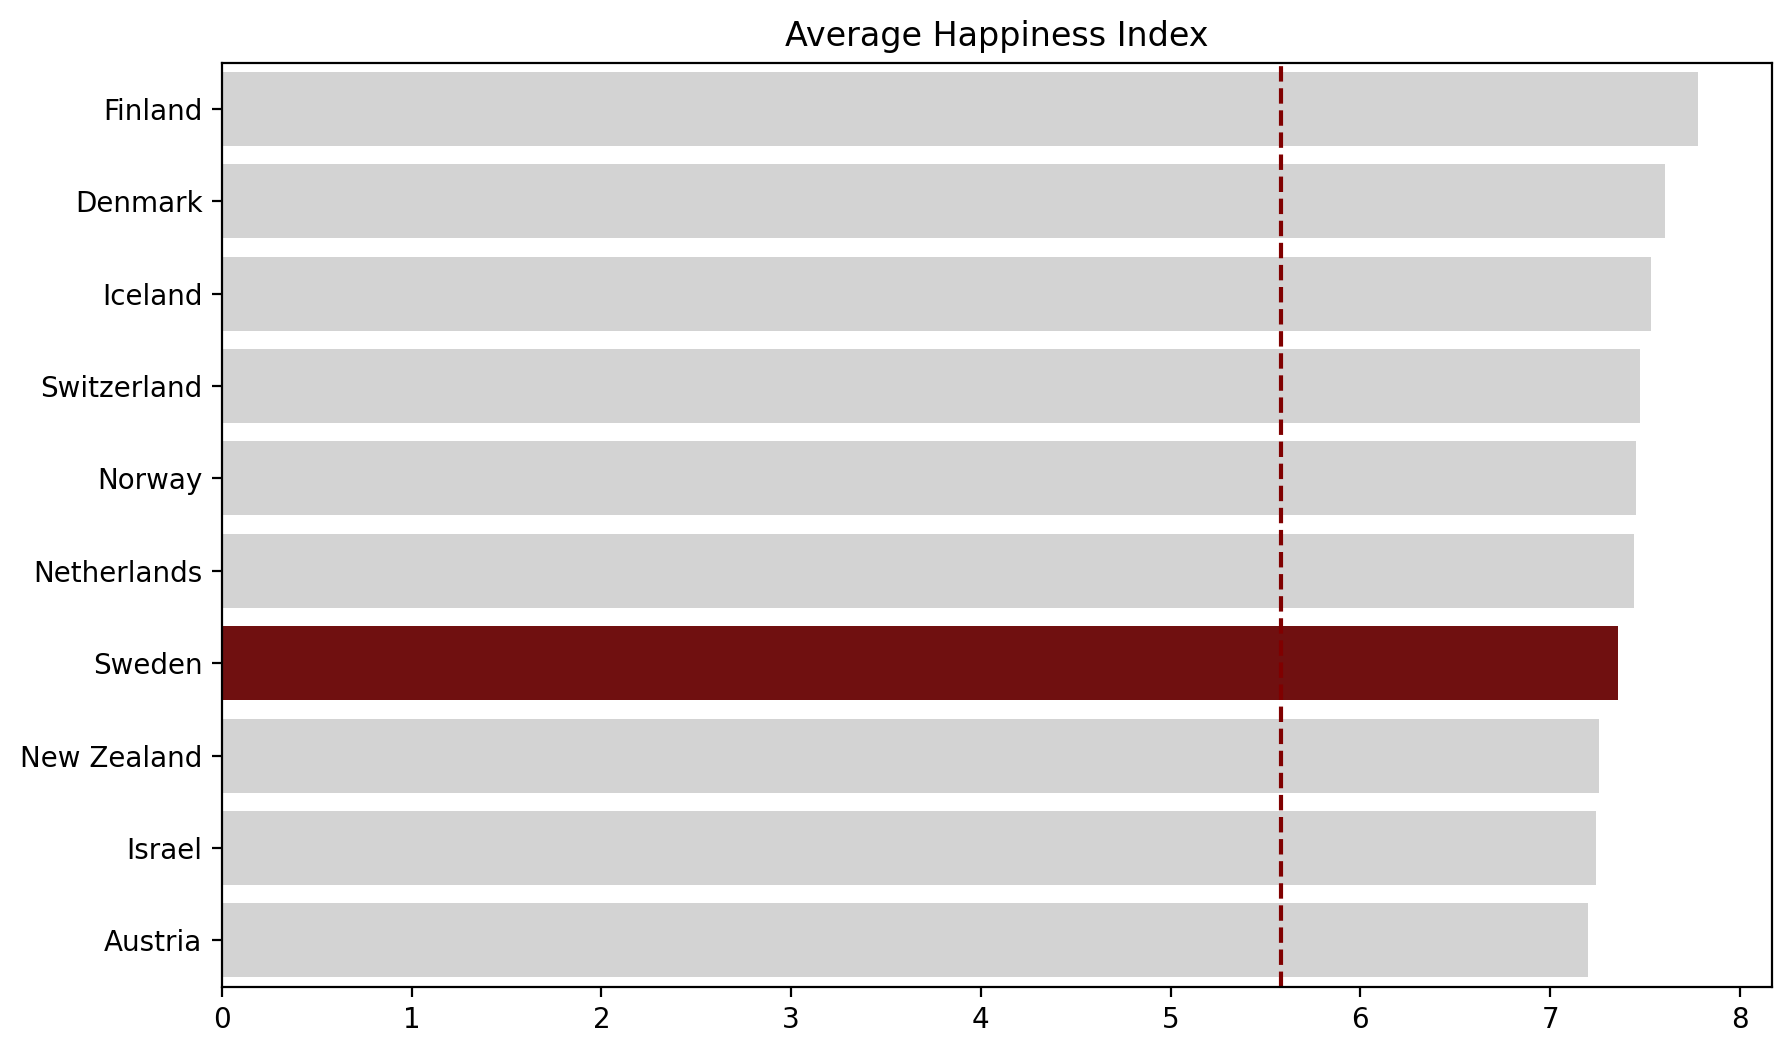

In [19]:
# เจาะลึกประเทศสวีเดน
dh_avg=dh_with_mean['Mean'].mean()
colors = ['maroon' if Country == 'Sweden' else 'lightgray' for Country in dh_with_mean.head(10)['Country']]
plt.figure(figsize=(10, 6))
warnings.filterwarnings("ignore")
sns.barplot(x='Mean', y='Country', data=dh_with_mean.head(10), palette=colors)

plt.title('Average Happiness Index')
plt.xlabel('')
plt.ylabel('')
plt.axvline(x=dh_avg, color='maroon', linestyle='--');

จากกราฟจะเห็นว่าค่าเฉลี่ยดัชนีความสุขของประเทศ 10 อันดับแรก สวีเดนจะอยู่อันดับที่ 7 ของโลก ซึ่งถือว่าเป็นอันดับที่สูงมาก ที่เป็นเช่นนี้อาจเป็นเพราะว่าสวีเดนเป็นประเทศที่มีป่าไม้ธรรมชาติสวยงาม มีรัฐสวัสดิการดี การศึกษาอยู่ในระดับชั้นนำของโลก มีรายได้ต่อหัวสูง 

## 2. เจาะลึกประเทศสวีเดน อัตราการเปลี่ยนแปลงตั้งแต่ปี 2018 - 2023

In [20]:
dh_sweden = dh.iloc[5]             
dh_sweden = dh_sweden.to_frame().T.melt().drop(0, axis=0)
# เปลี่ยนชื่อ column
dh_sweden.rename(columns={'variable':'Year', 'value':'Index'}, inplace=True)
dh_sweden['Year'] = dh_sweden['Year'].astype(str).str.strip()

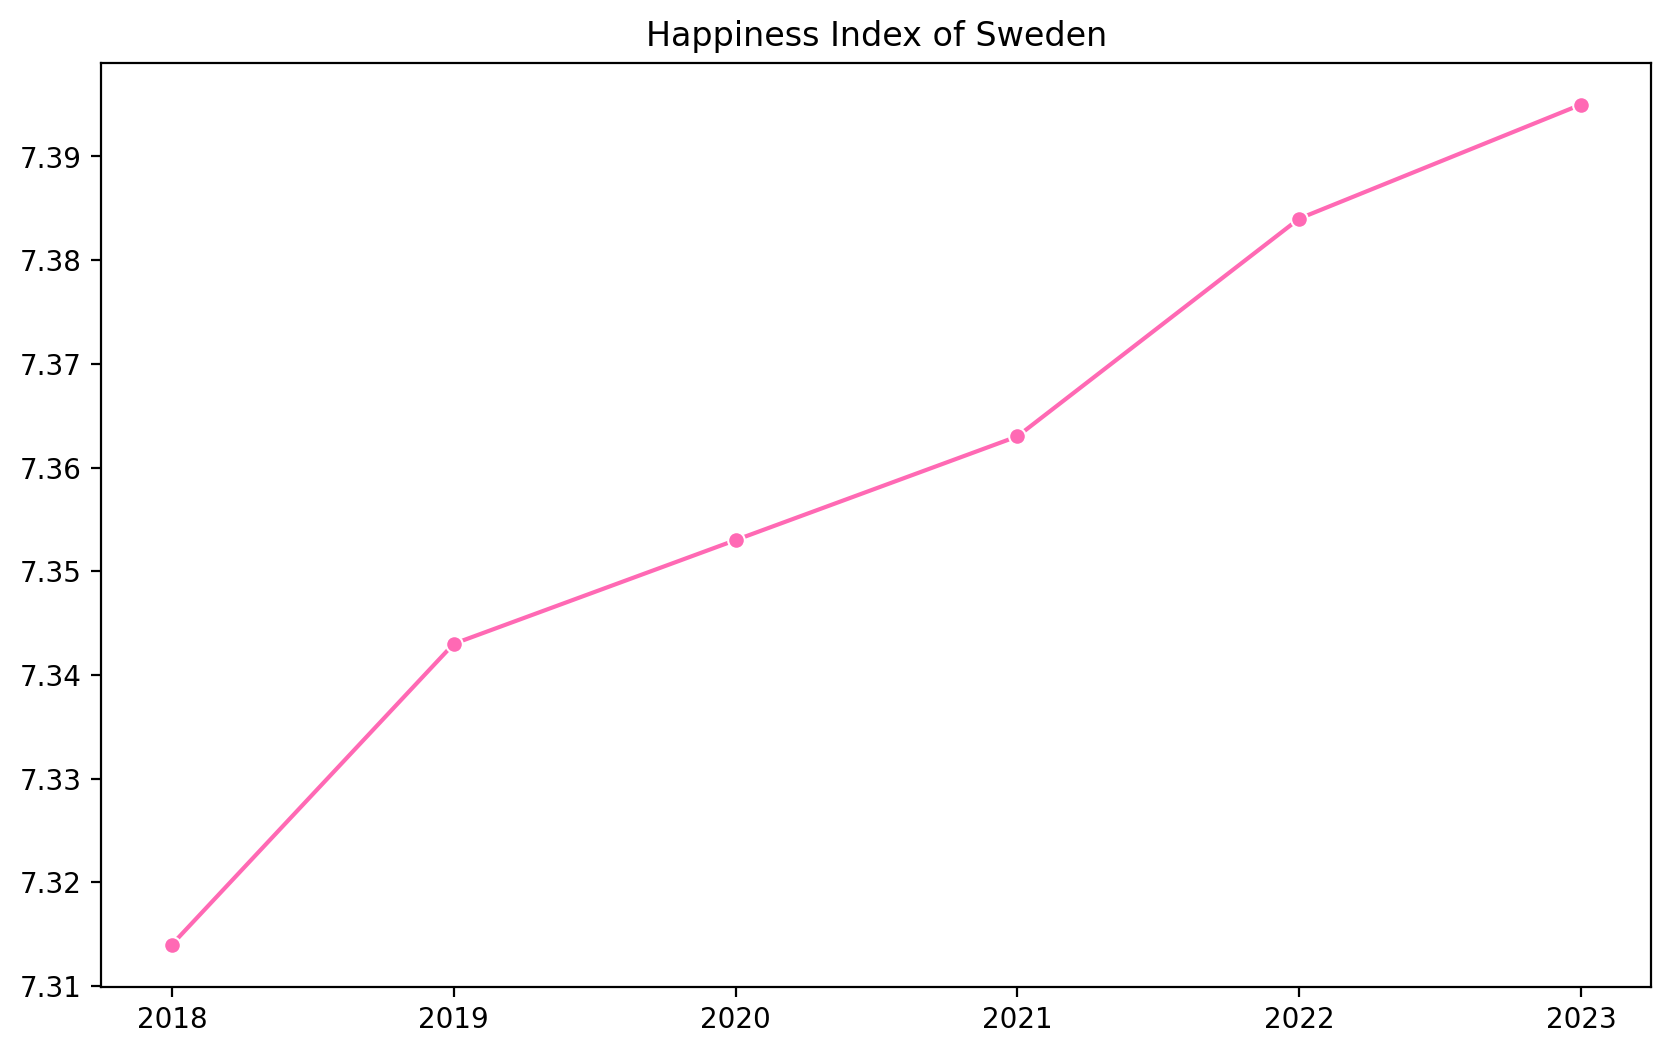

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Index', data=dh_sweden, marker='o', color='hotpink')

plt.title('Happiness Index of Sweden')
plt.xlabel('')
plt.ylabel('');

จากกราฟจะเห็นว่าค่าดัชนีความสุขของประเทศสวีเดน มีอัตราการเพิ่มขึ้นต่อเนื่อง ตั้งแต่ปี 2018-2023 แม้ช่วงใกล้สิ้นปี 2019 จะเกิด Covid-19 ก็ตามแต่ค่าดัชนีความสุขของคนในประเทศสวีเดนยังคงเพิ่มขึ้น แสดงว่าประเทศนี้คงมีอะไรดีจริง แต่เมื่อเราได้ศึกษาปัจจัยอื่นเพิ่มเติมเราได้กับข้อมูลน่าสนใจที่มันขัดแย้งกับภาพลักษณ์ของประเทศสวีเดนที่เราเห็น

## 3. จัดอันดับ 10 ประเทศที่มีอัตราการลักทรัพย์มากที่สุด

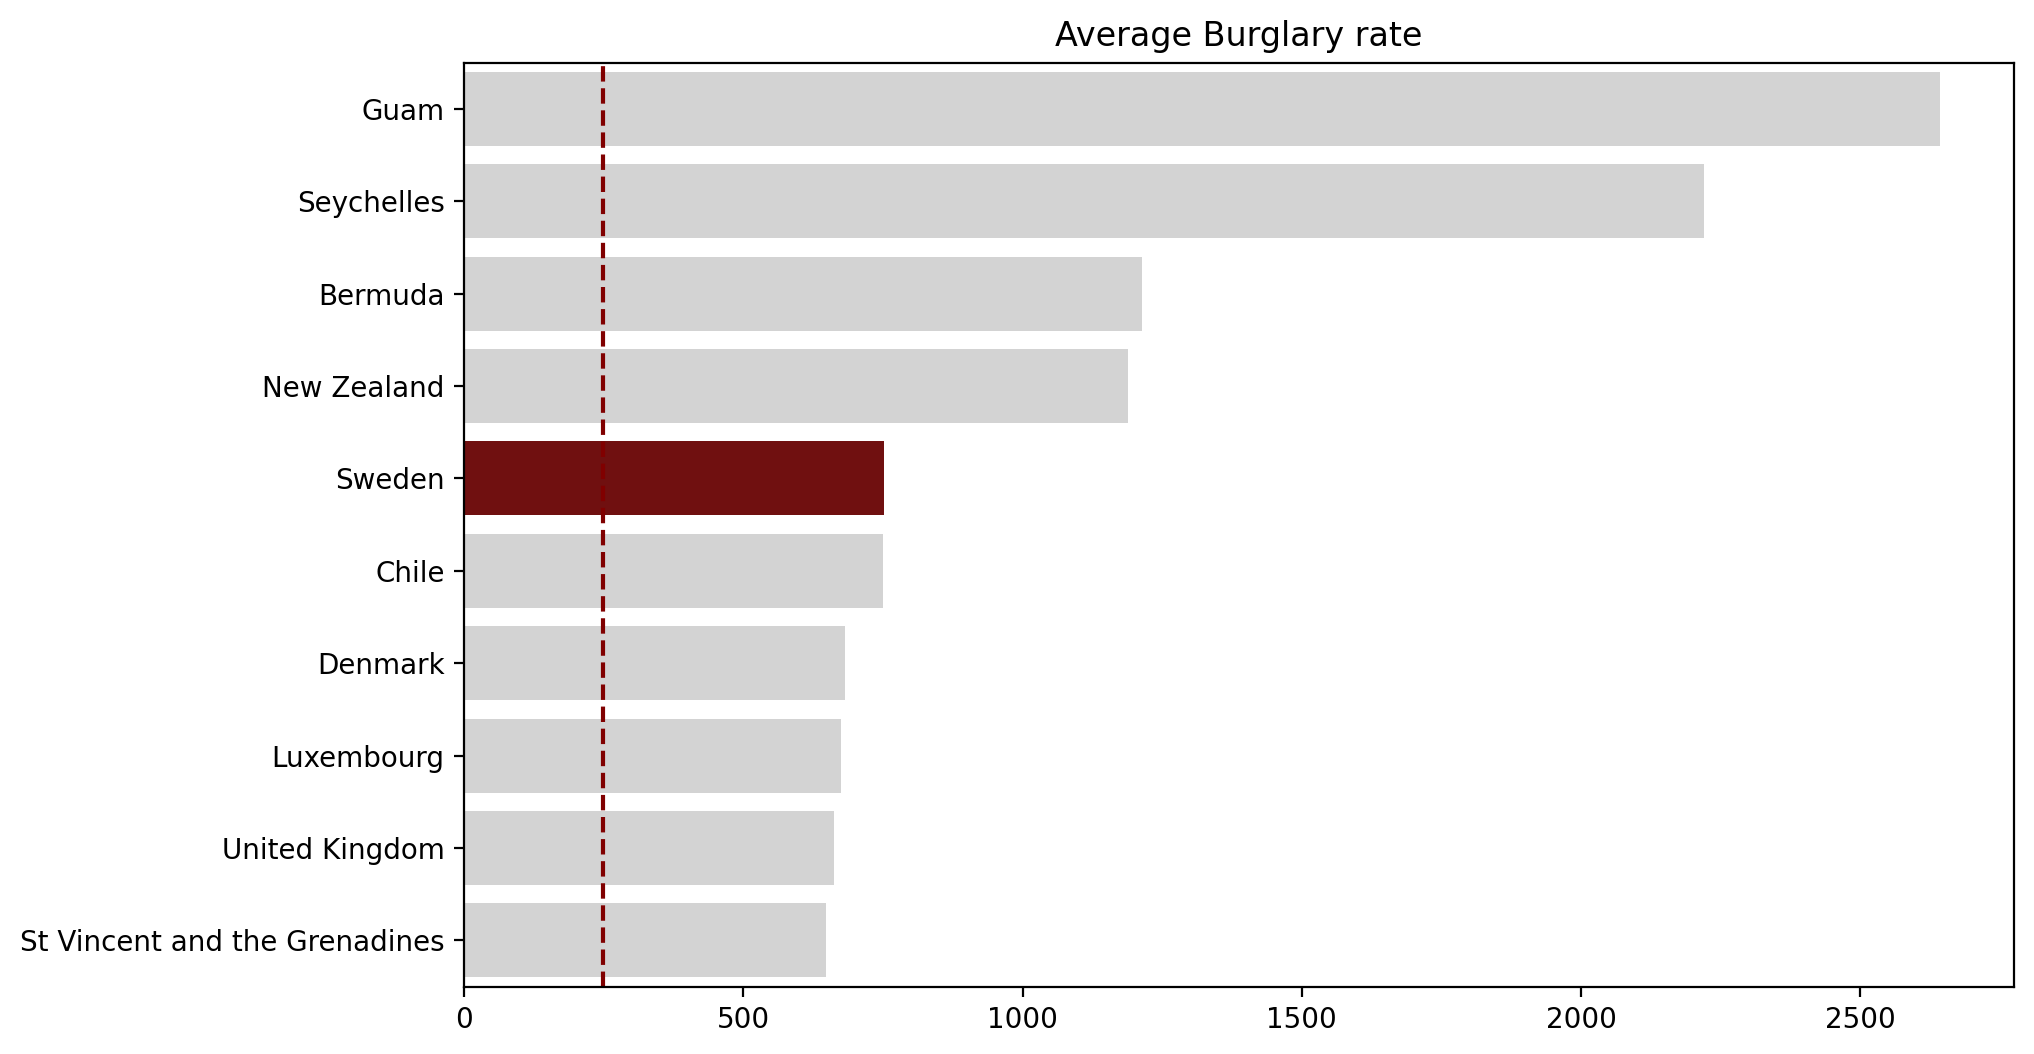

In [22]:
# เจาะลึกประเทศสวีเดน
db_avg=db_with_mean['Mean'].mean()
colors = ['maroon' if Country == 'Sweden' else 'lightgray' for Country in db_with_mean.head(10)['Country']]
plt.figure(figsize=(10, 6))
warnings.filterwarnings("ignore")
sns.barplot(x='Mean', y='Country', data=db_with_mean.head(10), palette=colors)

plt.title('Average Burglary rate')
plt.xlabel('')
plt.ylabel('')
plt.axvline(x=db_avg, color='maroon', linestyle='--');

จากกราฟพบว่าค่าเฉลี่ยการลักทรัพย์จากประเทศ 10 อันดับแรกทั่วโลก สวีเดนอยู่อันดับที่ 5 เป็นที่น่าตกใจเพราะอันดับนี้ถือว่าสูงมาก ทั้งที่ประเทศสวีเดนเป็นประเทศที่ผู้คนมีความสุขติดอันดับของโลกแต่ในขณะเดียวกันก็เป็นประเทศที่มีการลักทรัพย์สูงมากเช่นกัน จึงเกิดคำถามขึ้นมาว่าเพราะอะไรประเทศนี้จึงมีอัตราการลักทรัพย์สูง คนสวีเดนยิ่งมีความสุขเมื่อเกิดการลักทรัพย์หรืออย่างไร

## 4. เจาะลึกประเทศสวีเดน อัตราการเปลี่ยนแปลงตั้งแต่ปี 2018 - 2023

In [23]:
db_sweden = db.iloc[5]
db_sweden = db_sweden.to_frame().T.melt().drop(0, axis=0)
db_sweden.rename(columns={'variable':'Year', 'value':'Rate'}, inplace=True)
db_sweden['Year'] = db_sweden['Year'].astype(str).str.strip()

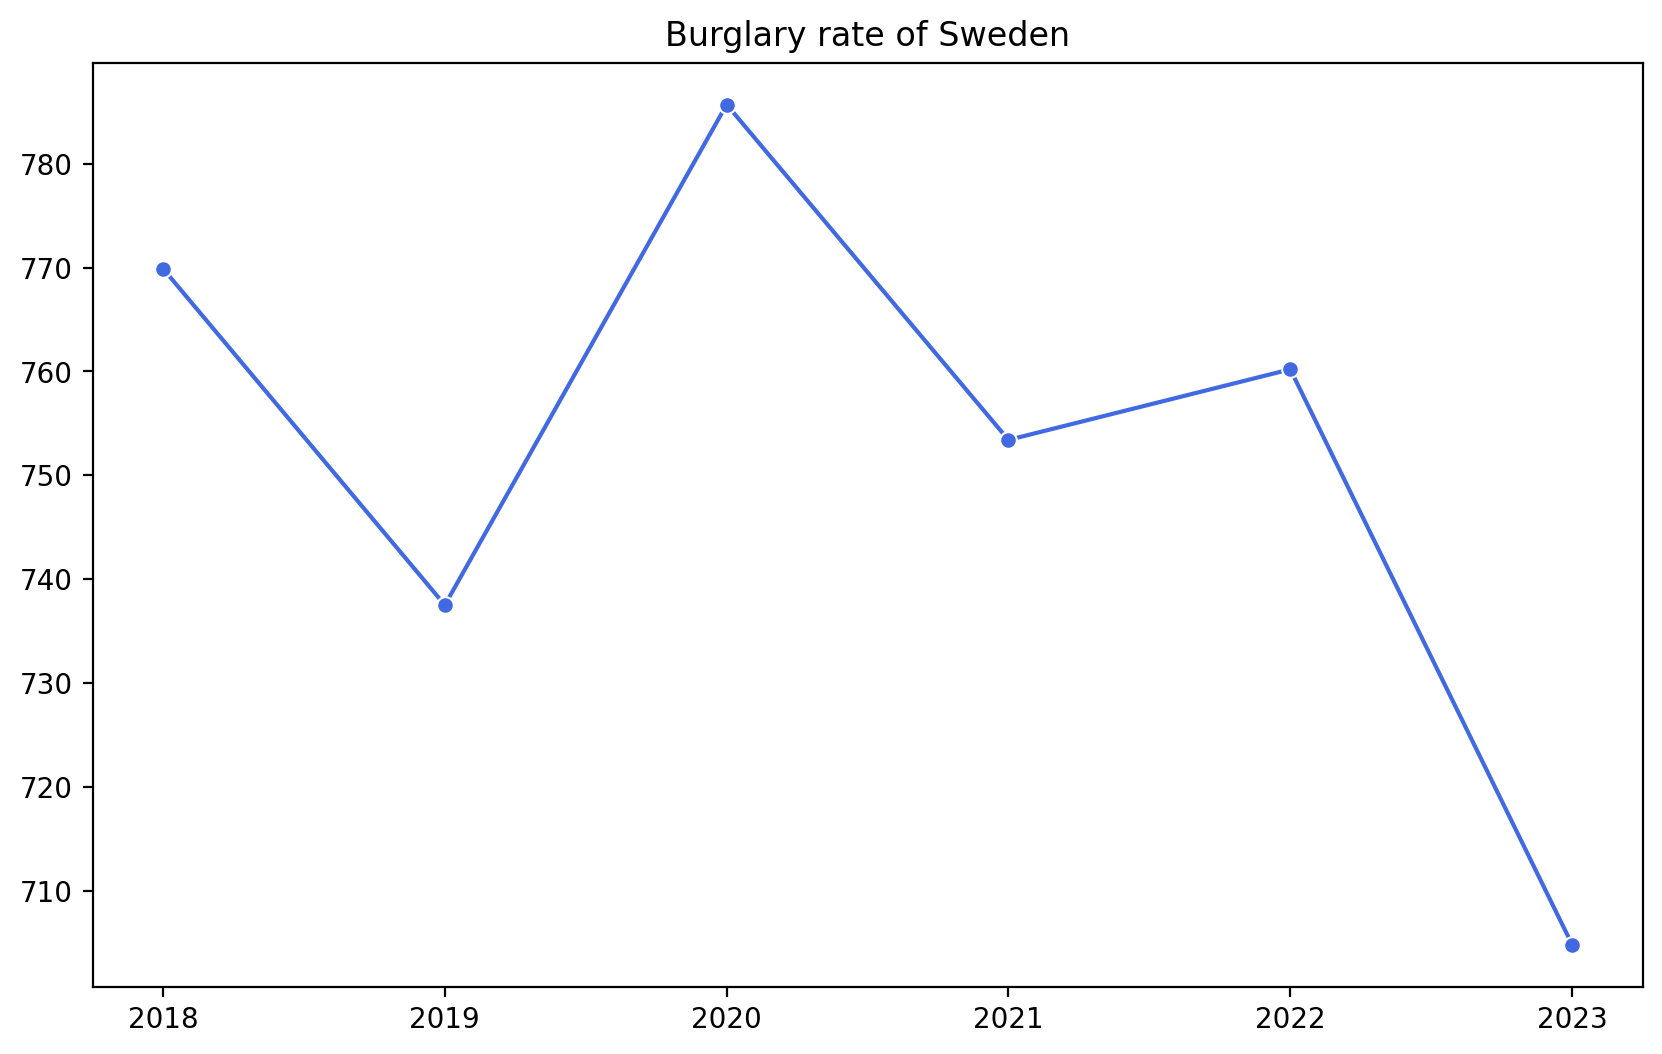

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Rate', data=db_sweden, marker='o', color='royalblue')

plt.title('Burglary rate of Sweden')
plt.xlabel('')
plt.ylabel('');

อัตราการลักทรัพย์ ในช่วง 10 ปีมานี้ ประเทศสวีเดนได้มีการรับผู้อพยพมากกว่า 2 ล้านคนจากทั่วทุกมุมโลก ไม่ว่าจะเป็นจากบอลข่าน ตะวันออกกลางและอิรัก ซึ่งกลุ่มคนบางกลุ่มได้อพยพมาเพื่อแสวงหาผลประโยชน์กับระบบสวัสดิการของสวีเดน จากการหาข้อมูลเชิงลึกกล่าวว่ากลุ่มอาชญากรได้แทรกซึมในกระบวนการยุติธรรม พรรคการเมืองและตำรวจ ทำให้อัตราการเกิดอาชญากรรมนั้นมีจำเพิ่มมากขึ้น และนอกจากนี้จะเห็นว่าอัตราการลักทรัพย์พุ่งขึ้นสูงจากปี 2019 ไปปี 2020 สันนิษฐานได้ว่าเป็นเพราะเกิดจากเหตุการณ์โควิด-19 เศรษฐกิจหยุดชะงัก คนถูกเลิกจ้างเยอะจึงนำไปสู่เหตุการณ์ลักทรัพย์เพื่อประทังชีวิต แต่ในปีถัดๆ ไปตัวเลขก็ได้ลดลงมาจนถึงเกือบๆ พอกับก่อนเกิดโควิด ซึ่งอาจเป็นเพราะรัฐมีมาตรการจัดการที่รัดกุมมากขึ้น

## 5. เทียบดัชนีความสุขกับอัตราการลักทรัพย์ปี 2018 - 2023 มีแนวโน้มเป็นอย่างไร

In [25]:
df = pd.merge(db_sweden, dh_sweden, on = 'Year')
df.head(10)

,Year,Rate,Index
0,2018,769.9,7.314
1,2019,737.5,7.343
2,2020,785.7,7.353
3,2021,753.4,7.363
4,2022,760.2,7.384
5,2023,704.8,7.395


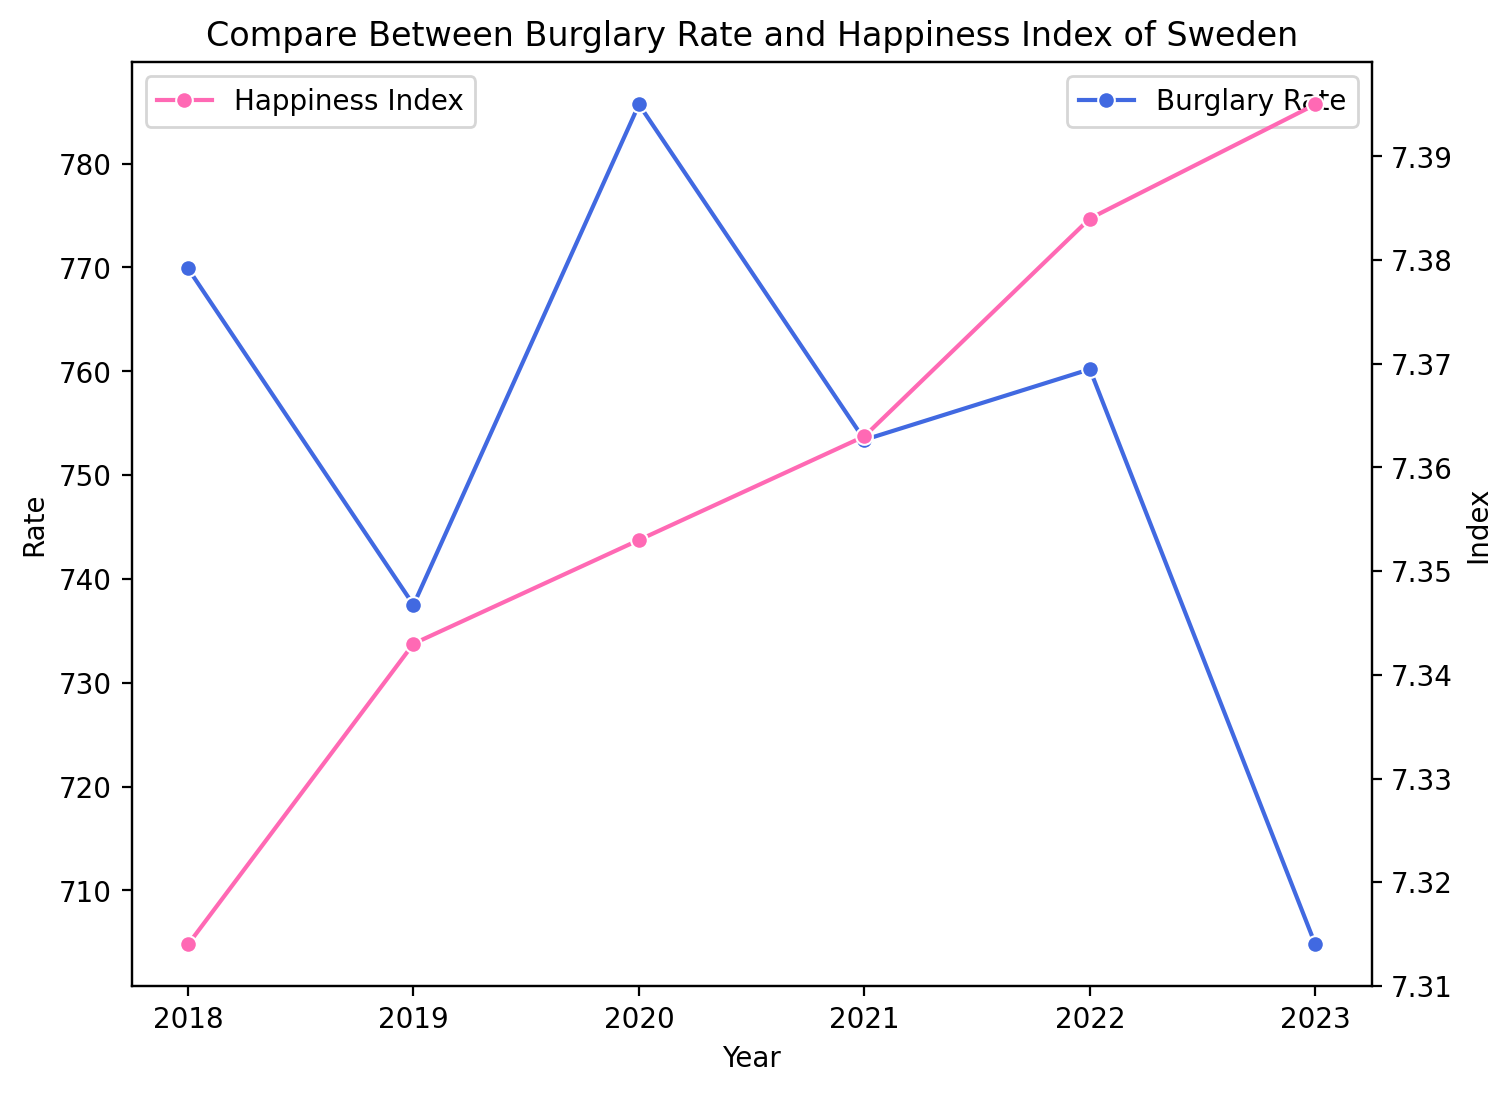

In [26]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='Rate', data=df, marker='o', label='Burglary Rate', color='royalblue')
# ax2 = the secondary y-axis
ax2 = plt.gca().twinx() #shares the same x-axis = create a secondary y-axis
sns.lineplot(x='Year', y='Index', data=df, marker='o', label='Happiness Index', color='hotpink', ax=ax2)

plt.title('Compare Between Burglary Rate and Happiness Index of Sweden');


จากกราฟเห็นว่าค่าดัชนีความสุขเพิ่มขึ้นเรื่อยๆ ในขณะที่อัตราการลักทรัพย์มันมีการขึ้นลงแบบไม่แน่นอน เช่น จากปี 2018 ไปปี 2019 ค่าดัชนีความสุขเพิ่มขึ้นในขณะที่อัตราการลักทรัพย์ลดลง แต่พอเป็นปี 2019 ไปปี 2020 ค่าดัชนีความสุขเพิ่มขึ้นขณะที่อัตราการลักทรัพย์ก็เพิ่มขึ้นเช่นกัน จึงนำไปสู่การหา Scatter plot (ข้อ 6)ว่าดัชนีค่าความสุขกับอัตราการลักทรัพย์มีความสัมพันธ์ข้องเกี่ยวกันมากแค่ไหนหรือไม่เกี่ยวกัน โดยเรานำข้อมูลของประเทศทั่วโลกมาวิเคราะห์

## 6. หาความสัมพันธ์ระหว่างอัตราการลักทรัพย์กับดัชนีค่าความสุขของประเทศทั่วโลก มีความเกี่ยวข้องกันมากแค่ไหน 

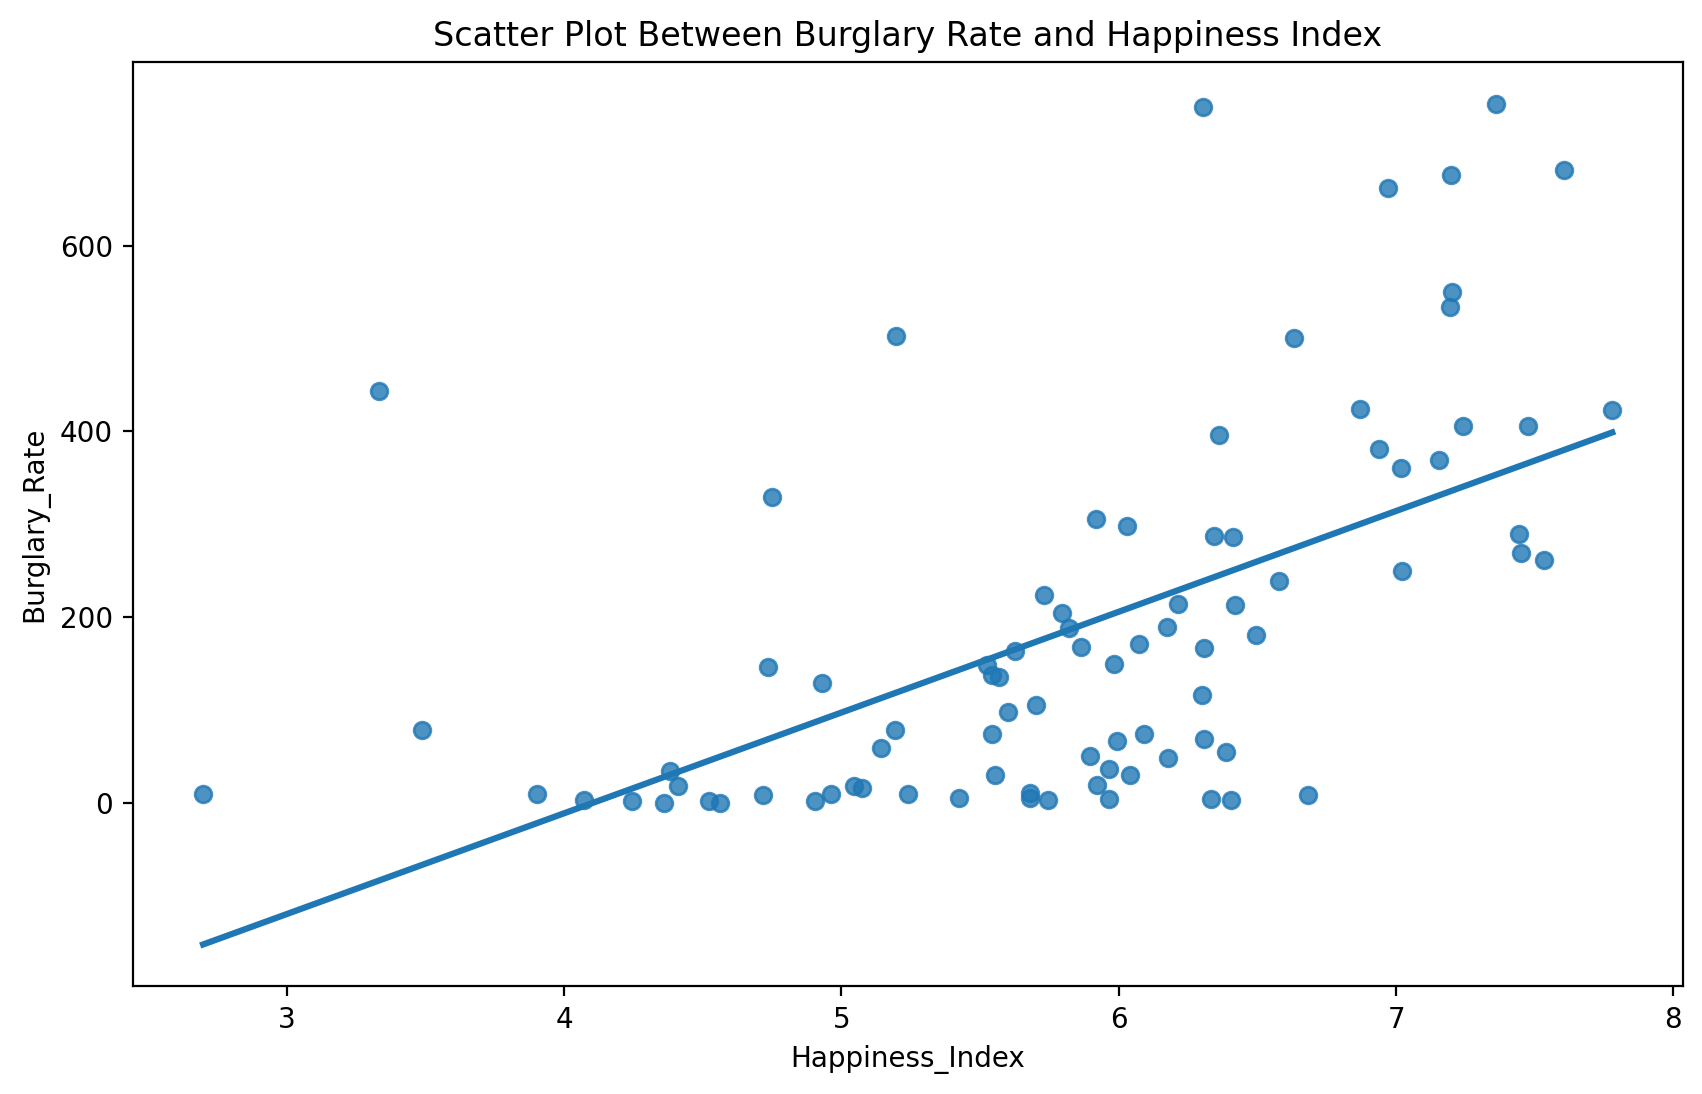

In [27]:
plt.figure(figsize=(10,6))
# regplot:trend line                                                                     #remove the shaded background
sns.regplot(x='Happiness_Index', y='Burglary_Rate', data=dm[dm['Burglary_Rate'] <= 1100], ci=None)

plt.title('Scatter Plot Between Burglary Rate and Happiness Index');

In [28]:
# มีแนวโน้มเป็น Positive Correlation
dm_excluded_first_row = dm.iloc[1:]
correlation = dm_excluded_first_row['Burglary_Rate'].corr(dm_excluded_first_row['Happiness_Index'])*100
print(f"Correlation = {correlation:.2f} %")

Correlation = 56.98 %


###### *Note:* Correlation คือค่าที่ดูทิศทางความสัมพันธ์ระหว่างตัวแปร 2 ตัว ค่าสัมประสิทธิ์สหสัมพันธ์นี้จะมีค่าอยู่ระหว่าง -1.0 ถึง +1.0 ซึ่งหากมีค่าใกล้ -1.0 นั้นหมายความว่าตัวแปรทั้งสองตัวมีความสัมพันธ์กันอย่างมากในเชิงตรงกันข้าม หากมีค่าใกล้ +1.0 นั้นหมายความว่า ตัวแปรทั้งสองมีความสัมพันธ์กันโดยตรงอย่างมาก และหากมีค่าเป็น 0 นั้นหมายความว่า ตัวแปรทั้งสองตัวไม่มีความสัมพันธ์ต่อกัน

จากกราฟจะเห็นว่าค่าดัชนีความสุขกับอัตราการลักทรัพย์มีแนวโน้มเป็น Positive Correlation เมื่อคำนวณหาค่าความสัมพันธ์โดยตรงพบว่าตัวเลขอยู่ที่ 0.56 นั่นหมายความว่ามันมีความสัมพันธ์กัน ไม่ใช่ไม่มีความสัมพันธ์ต่อกันเลย โดยตัวเลข 0.56 อยู่ที่ระดับกลางๆ ไม่ได้ส่งผลต่อกันมาก

## สรุป

จากการศึกษาทั้งดัชนีความสุขและอัตราการลักทรัพย์ ประเทศสวีเดนมีดัชนีค่าความสุขอยู่อันดับ 7 ส่วนอัตราการลักทรัพย์อยู่อันดับ 5 ของโลก เมื่อหาค่าความสัมพันธ์ของ 2 ตัวแปรนี้โดยใช้ข้อมูลของประเทศทั่วโลกพบว่ามันมีความสัมพันธ์กันที่ 56.98 % หมายความว่า 2 ตัวแปรนี้มีความข้องเกี่ยวกันอยู่ ทั้งนี้ทั้งนั้นไม่มีประเทศไหนที่จะดีพร้อมไปหมดทุกด้าน แต่ละประเทศต่างก็มีข้อดีข้อเสียแตกต่างกัน ขึ้นอยู่กับว่าเรายอมรับข้อเสียของมันได้มากน้อยแค่ไหน

## ข้อเสนอแนะ

อย่างไรก็ตามปัญหาการลักทรัพย์ที่เกิดขึ้นสูงในประเทศสวีเดนอาจไม่ได้เกิดจากเหล่าผู้คนที่อพยพ หากมีการศึกษาลงลึกถึงคนที่ลักทรัพย์ละเอียดแบบรายบุคคล อาจพบว่าเกิดจากคนในท้องถิ่น หรือคนลักทรัพย์อาจเป็นคนที่มีโรคทางจิตเภทประเภทหนึ่ง  เนื่องจากเคยมีข่าวหลายแห่งที่นำเสนอเกี่ยวกับการลักทรัพย์ในประเทศอื่นที่ไม่ใช่สวีเดนซึ่งคนลักทรัพย์เป็นคนในท้องที่เสียเอง เช่น ในอเมริกา มีข่าวคนลักขโมยของในห้าง เมื่อสอบสวนพบว่าบุคคลนั้นเป็นบุคคลที่ฐานะมีอันจะกินแต่มาลักขโมยเพราะชีวิตน่าเบื่อ อยากมีสีสันในชีวิต หรือในญี่ปุ่นที่คนมาลักขโมยของในมาร์ทเพราะอยากเรียกร้องความสนใจจากครอบครัว เป็นต้น

## อ้างอิง:  
* The violent gang crisis shaking Sweden. (n.d.). Www.ft.com. https://www.ft.com/content/79f0d181-bdae-4c81-a971-861ccd8d512c  
* Spread of gang violence wrecks Sweden’s peaceful image. (n.d.). www.bbc.com. https://www.bbc.com/news/world-middle-east-67342368#
* “สวีเดน” ประเทศที่สงบสุข สู่ความรู้สึกไม่ปลอดภัยของประชาชน | Mission To The Moon EP.2008. (n.d.). Www.youtube.com. Retrieved March 12, 2024, from https://youtu.be/_zxEqgCz01o?si=DOvEhXmGlGPilseF
* ลุงโดนจับหลังจิ๊กของในห้าง ตร. อึ้งหนัก ที่แท้รวยมาก เพิ่งซื้อเกาะส่วนตัว 254 ล้าน. (2019, April 11). Kapook.com. https://hilight.kapook.com/view/186628
* Kleptomania โรคชอบหยิบฉวย ของคนป่วยทางจิต. (2011, February 16). Kapook.com. https://health.kapook.com/view21661.html